## Experiments template for networks of different sizes, multiple sample networks for each size, multiple runs per sample

In [21]:
import os


dir = "multiple_network_samples/networks"
os.makedirs(os.path.dirname(dir+"/"), exist_ok=True)


def make_dir(dir):
    if not os.path.exists(dir):
        os.mkdir(dir)

### Generate networks

First fixed Powerlaw networks with m = 1, and p = 0.1.\
Variable number of nodes, fixed number of generated networks per number of nodes.

In [22]:
dir = dir+"/powerlaw_m=1_p=0.1"
os.makedirs(os.path.dirname(dir+"/"), exist_ok=True)

In [23]:
import numpy as np


MIN_NODES = 10
MAX_NODES = 100

num_nodes = np.linspace(MIN_NODES, MAX_NODES, MAX_NODES//MIN_NODES)
num_nodes

array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

Number of networks to produce per each network size

In [24]:
NUM_NETWORKS = 10

In [25]:
import numpy as np
import networkx as nx


try:
    Graphs = np.load(f"{dir}/graphs.npy", allow_pickle=True)
except:
    Graphs = np.empty(shape=(len(num_nodes),), dtype=object)
    for i, n in enumerate(num_nodes):
        Graphs[i] = [nx.powerlaw_cluster_graph(n=n, m=1, p=0.1) for _ in range(NUM_NETWORKS)]
    np.save(f"{dir}/graphs.npy", Graphs)

In [26]:
# output folder
dir =dir+"/output"
os.makedirs(os.path.dirname(dir+"/"), exist_ok=True)

#### Hierarchical approach with Gurobi first

In [27]:
solver = "gurobi"
make_dir(f"{dir}/{solver}")

In [28]:
from Qommunity.samplers.hierarchical.gurobi_sampler import GurobiSampler
from Qommunity.searchers.hierarchical_community_searcher.hierarchical_community_searcher import HierarchicalCommunitySearcher

In [29]:
from tqdm import tqdm


N_RUNS = 5


mods = np.zeros((num_nodes.shape[0], NUM_NETWORKS, N_RUNS))
comms = np.empty((num_nodes.shape[0], NUM_NETWORKS, N_RUNS), dtype=object)

mods_graph_N = np.zeros((NUM_NETWORKS, N_RUNS))
comms_graph_N = np.empty((NUM_NETWORKS, N_RUNS), dtype=object)
for i, graphs_N in tqdm(enumerate(Graphs)):    
    mods_graph_N = np.zeros((NUM_NETWORKS, N_RUNS))
    for j, G in enumerate(graphs_N):
        for r in range(N_RUNS):
            # new instance of the sampler each time
            gurobi = GurobiSampler(G, supress_output=True)
            hierch_searcher = HierarchicalCommunitySearcher(gurobi)
            comms_res = hierch_searcher.hierarchical_community_search()
        
            mod_score = nx.community.modularity(G, comms_res)
            mods_graph_N[j, r] = mod_score
            comms_graph_N[j, r] = comms_res

    current_net_size = int(num_nodes[i])
    mods[i] = mods_graph_N
    comms[i] = comms_graph_N
    np.save(f"{dir}/{solver}/{solver}-network_size_{current_net_size}", mods_graph_N)
    np.save(f"{dir}/{solver}/{solver}-network_size_{current_net_size}_comms", comms_graph_N)

np.save(f"{dir}/{solver}/{solver}-mods_final", mods)
np.save(f"{dir}/{solver}/{solver}-comms_final", comms)

10it [03:31, 21.17s/it]


#### Now Leiden

In [10]:
solver = "leiden"
make_dir(f"{dir}/{solver}")

In [11]:
from Qommunity.samplers.regular.leiden_sampler import LeidenSampler
from Qommunity.searchers.community_searcher.community_searcher import CommunitySearcher

In [12]:
from tqdm import tqdm


N_RUNS = 5


mods = np.zeros((num_nodes.shape[0], NUM_NETWORKS, N_RUNS))
comms = np.empty((num_nodes.shape[0], NUM_NETWORKS, N_RUNS), dtype=object)

mods_graph_N = np.zeros((NUM_NETWORKS, N_RUNS))
comms_graph_N = np.empty((NUM_NETWORKS, N_RUNS), dtype=object)
for i, graphs_N in tqdm(enumerate(Graphs)):    
    mods_graph_N = np.zeros((NUM_NETWORKS, N_RUNS))
    for j, G in enumerate(graphs_N):
        leiden = LeidenSampler(G)
        searcher = CommunitySearcher(leiden)
        for r in range(N_RUNS):
            comms_res = searcher.community_search()
            mod_score = nx.community.modularity(G, comms_res)
            mods_graph_N[j, r] = mod_score
            comms_graph_N[j, r] = comms_res

    current_net_size = int(num_nodes[i])
    mods[i] = mods_graph_N
    comms[i] = comms_graph_N
    np.save(f"{dir}/{solver}/{solver}-network_size_{current_net_size}", mods_graph_N)
    np.save(f"{dir}/{solver}/{solver}-network_size_{current_net_size}_comms", comms_graph_N)

np.save(f"{dir}/{solver}/{solver}-mods_final", mods)
np.save(f"{dir}/{solver}/{solver}-comms_final", comms)

0it [00:00, ?it/s]

10it [00:00, 31.24it/s]


#### Now Louvain

In [13]:
solver = "louvain"
make_dir(f"{dir}/{solver}")

In [14]:
from Qommunity.samplers.regular.louvain_sampler import LouvainSampler
from Qommunity.searchers.community_searcher import CommunitySearcher

In [15]:
from tqdm import tqdm


N_RUNS = 5


mods = np.zeros((num_nodes.shape[0], NUM_NETWORKS, N_RUNS))
comms = np.empty((num_nodes.shape[0], NUM_NETWORKS, N_RUNS), dtype=object)

mods_graph_N = np.zeros((NUM_NETWORKS, N_RUNS))
comms_graph_N = np.empty((NUM_NETWORKS, N_RUNS), dtype=object)
for i, graphs_N in tqdm(enumerate(Graphs)):    
    mods_graph_N = np.zeros((NUM_NETWORKS, N_RUNS))
    for j, G in enumerate(graphs_N):
        louvain = LouvainSampler(G)
        searcher = CommunitySearcher(louvain)
        
        for r in range(N_RUNS):
            comms_res = searcher.community_search()
            mod_score = nx.community.modularity(G, comms_res)
            mods_graph_N[j, r] = mod_score
            comms_graph_N[j, r] = comms_res

    current_net_size = int(num_nodes[i])
    mods[i] = mods_graph_N
    comms[i] = comms_graph_N
    np.save(f"{dir}/{solver}/{solver}-network_size_{current_net_size}", mods_graph_N)
    np.save(f"{dir}/{solver}/{solver}-network_size_{current_net_size}_comms", comms_graph_N)

np.save(f"{dir}/{solver}/{solver}-mods_final", mods)
np.save(f"{dir}/{solver}/{solver}-comms_final", comms)

0it [00:00, ?it/s]

10it [00:01,  8.88it/s]


#### Results

In [30]:
mods_gurobi = np.load(f"{dir}/gurobi/gurobi-mods_final.npy")
mods_leiden = np.load(f"{dir}/leiden/leiden-mods_final.npy")
mods_louvain = np.load(f"{dir}/louvain/louvain-mods_final.npy")

Get the maxes

In [31]:
# Joan did plotting maxes this way - incorrect
mods_gurobi.max(axis=-1)[:, 0]

array([0.36419753, 0.48476454, 0.52615933, 0.65023011, 0.65326947,
       0.74274634, 0.76170972, 0.7648614 , 0.72351976, 0.74517906])

In [32]:
# The correct way to get maxes
mods_gurobi.max(axis=-1).max(axis=-1)

array([0.42592593, 0.58033241, 0.63614744, 0.69888231, 0.72219908,
       0.74461362, 0.76170972, 0.77479571, 0.79068299, 0.80410162])

In [33]:
max_mods_gurobi = [mods_per_network_size.max() for mods_per_network_size in mods_gurobi]
print((max_mods_gurobi == mods_gurobi.max(axis=-1).max(axis=-1)).all())

max_mods_leiden = [mods_per_network_size.max() for mods_per_network_size in mods_leiden]
print((max_mods_leiden == mods_leiden.max(axis=-1).max(axis=-1)).all())

True
True


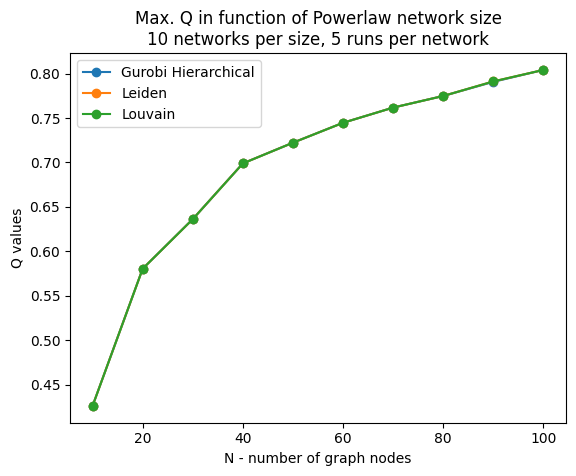

In [34]:
from matplotlib import pyplot as plt


fig, ax = plt.subplots(1)
plt.plot(num_nodes, mods_gurobi.max(axis=-1).max(axis=-1), '-o', label="Gurobi Hierarchical")
plt.plot(num_nodes, mods_leiden.max(axis=-1).max(axis=-1), '-o', label="Leiden")
plt.plot(num_nodes, mods_louvain.max(axis=-1).max(axis=-1), '-o', label="Louvain")
plt.legend()
ax.set_title(f"Max. Q in function of Powerlaw network size\n" + 
             f"10 networks per size, {N_RUNS} runs per network");
ax.set_xlabel("N - number of graph nodes");
ax.set_ylabel("Q values");